In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (silhouette_score,
                             accuracy_score,
                             classification_report,
                             confusion_matrix,
                             ConfusionMatrixDisplay
                             )

In [212]:
data = pd.read_csv("bank_transactions.csv")

In [213]:
data

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [215]:
data.columns.tolist()


['TransactionID',
 'CustomerID',
 'CustomerDOB',
 'CustGender',
 'CustLocation',
 'CustAccountBalance',
 'TransactionDate',
 'TransactionTime',
 'TransactionAmount (INR)']

In [216]:
data.isnull().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [217]:
data['CustLocation'].unique().tolist()

['JAMSHEDPUR',
 'JHAJJAR',
 'MUMBAI',
 'NAVI MUMBAI',
 'ITANAGAR',
 'GURGAON',
 'MOHALI',
 'GUNTUR',
 'AHMEDABAD',
 'THANE',
 'PUNE',
 'NEW DELHI',
 'NO 3 KALYANI NAGAR PUNE',
 'SECUNDERABAD',
 'WAYS PANCHKUVA AHMEDABAD',
 'LUCKNOW',
 'DELHI',
 'CHENNAI',
 'GRAM PANCHAYTH HYDERABAD',
 'GHAZIABAD',
 'BANGALORE',
 'GUWAHATI',
 'DHANBAD',
 'MUKTSAR',
 'SOCORRO',
 'ANDHERI (EAST) MUMBAI',
 'AURANGABAD',
 'KOTA',
 'JAIPUR',
 'K V RANGAREDDY',
 'MUZAFFARNAGAR',
 'BURDWAN',
 'LUDHIANA',
 'NOIDA',
 'AGRA',
 'SHAHJAHANPUR',
 'DIST RAIGAD PANVEL',
 'DEHRADUN',
 'HYDERABAD',
 'GODDA',
 'REWARI (HARYANA)',
 'NELLORE',
 'ADIPUR',
 'DUBAI',
 'ALLAHABAD',
 'BATHINDA',
 'NASHIK',
 'JAMMU',
 'JABALPUR',
 'KASHIPUR',
 'ETAH',
 'KOLKATA',
 'VADODARA',
 'TIRUPUR',
 'SURAT',
 'NAGO THANE',
 'KARUR DT',
 'CHITTO0R',
 'INDORE',
 'OFF CUBBON ROAD BANGALORE',
 'PIMPALI',
 'PUMP HINJEWADI PUNE',
 'KANJURMARG EAST',
 'SOUTH 24 PARGANAS',
 'MIRABHAYANDER THANE MIRA ROAD',
 'SAHARANPUR',
 'CHANDIGARH',
 'COMPLEX G

In [218]:
# df = ['TransactionID', 'CustomerDOB', 'CustGender', 'CustLocation', 'CustAccountBalance']
# data.drop(df,inplace=True)

In [219]:
# data

In [220]:
col = ['CustomerID', 'TransactionTime', 'TransactionDate', 'TransactionAmount (INR)']
RFM = data[col]
RFM

,CustomerID,TransactionTime,TransactionDate,TransactionAmount (INR)
0,C5841053,143207,2/8/16,25.0
1,C2142763,141858,2/8/16,27999.0
2,C4417068,142712,2/8/16,459.0
3,C5342380,142714,2/8/16,2060.0
4,C9031234,181156,2/8/16,1762.5
...,...,...,...,...
1048562,C8020229,184824,18/9/16,799.0
1048563,C6459278,183734,18/9/16,460.0
1048564,C6412354,183313,18/9/16,770.0
1048565,C6420483,184706,18/9/16,1000.0


In [221]:
RFM['TransactionDate'] = pd.to_datetime(RFM['TransactionDate'], errors='coerce')

C:\Users\Admin\AppData\Local\Temp\ipykernel_7760\206017116.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\Admin\AppData\Local\Temp\ipykernel_7760\206017116.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [222]:
RFM

,CustomerID,TransactionTime,TransactionDate,TransactionAmount (INR)
0,C5841053,143207,2016-02-08,25.0
1,C2142763,141858,2016-02-08,27999.0
2,C4417068,142712,2016-02-08,459.0
3,C5342380,142714,2016-02-08,2060.0
4,C9031234,181156,2016-02-08,1762.5
...,...,...,...,...
1048562,C8020229,184824,2016-09-18,799.0
1048563,C6459278,183734,2016-09-18,460.0
1048564,C6412354,183313,2016-09-18,770.0
1048565,C6420483,184706,2016-09-18,1000.0


In [223]:
print(RFM['TransactionDate'].max())
print(RFM['TransactionDate'].min())

2016-12-09 00:00:00
2016-01-08 00:00:00


In [224]:
import datetime as dt

RFM['TransactionDate'] = pd.to_datetime(RFM['TransactionDate'])

now = dt.datetime(2016, 12, 9)
rfm_data = RFM.groupby('CustomerID').agg(
    Recency=('TransactionDate', lambda x: (now - x.max()).days),
    Frequency=('TransactionTime', 'count'),
    MonetaryValue=('TransactionAmount (INR)', 'sum')
)


C:\Users\Admin\AppData\Local\Temp\ipykernel_7760\538943354.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [225]:
rfm_data

,Recency,Frequency,MonetaryValue
CustomerID,,,
C1010011,74,2,5106.0
C1010012,117,1,1499.0
C1010014,154,2,1455.0
C1010018,85,1,30.0
C1010024,113,1,5000.0
...,...,...,...
C9099836,154,1,691.0
C9099877,85,1,222.0
C9099919,113,1,126.0


In [226]:
rfm_data['Recency_score'] = pd.qcut(rfm_data['Recency'], 3, labels=[3, 2, 1,0]) 
def Frequency_score(x):
    if x == 1:
        return 1
    elif x == 2:
        return 2
    elif x == 3:
        return 3
    else:
        return 0

rfm_data['Frequency_score'] = rfm_data['Frequency'].apply(Frequency_score)
rfm_data['MonetaryValue_score'] = pd.qcut(rfm_data['MonetaryValue'], 5, labels=[1, 2, 3, 4, 5]) 
rfm_data['RFM_SCORE'] = (rfm_data['Recency_score'].astype(str) + rfm_data['Frequency_score'].astype(str) + rfm_data['MonetaryValue_score'].astype(str))
rfm_data['RF_SCORE'] = (rfm_data['Recency_score'].astype(str) + rfm_data['Frequency_score'].astype(str))
rfm_data['FirstTransactionDate'] = df.groupby('CustomerID').agg({'TransactionDate': lambda x: x.max()})
rfm_data['LastTransactionDate'] = df.groupby('CustomerID').agg({'TransactionDate': lambda x: x.min()})
rfm_data

ValueError: Bin labels must be one fewer than the number of bin edges

In [ ]:
r = pd.qcut(rfm_data.Recency, 4, labels = list(range(0,4)))
f = pd.qcut(rfm_data.Frequency, 4, labels=list(range(0,4)))
m = pd.qcut(rfm_data.MonetaryValue, 4, labels = list(range(0,4)))
rfm_data_cutted = pd.DataFrame({'Recency' : r, 'Frequency' : f, 'MonetaryValue' : m})
rfm_data_cutted

ValueError: Bin edges must be unique: Index([1.0, 1.0, 1.0, 1.0, 6.0], dtype='float64', name='Frequency').
You can drop duplicate edges by setting the 'duplicates' kwarg

In [227]:
group = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(rfm_data)
    group.append([i, kmeans.inertia_])
groups = pd.DataFrame(group, columns = ['number_of_group', 'inertia'])
groups

,number_of_group,inertia
0,1,4.593776e+13
1,2,2.422077e+13
2,3,1.635468e+13
3,4,9.498766e+12
4,5,6.958381e+12
5,6,5.982640e+12
6,7,3.642247e+12
7,8,2.670134e+12
8,9,2.109732e+12
9,10,1.738302e+12


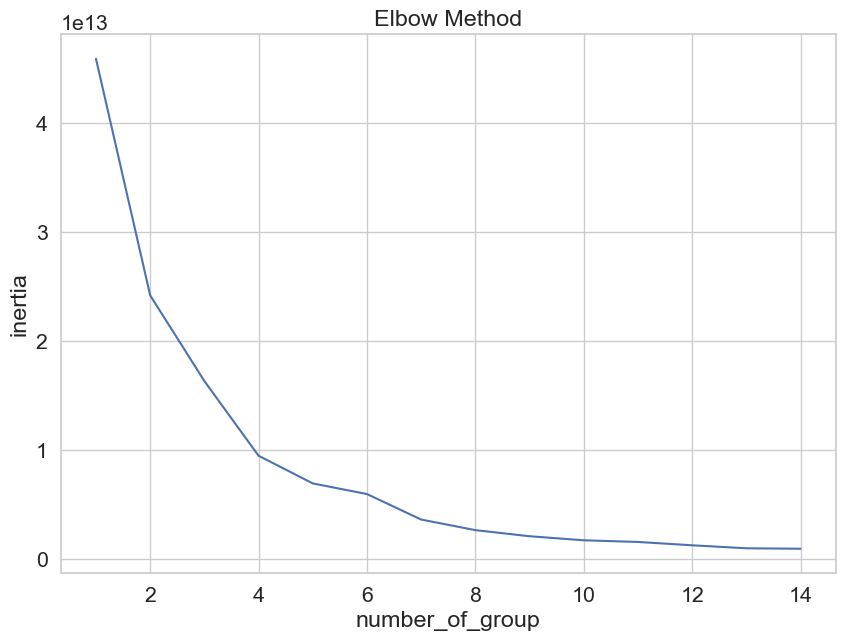

In [228]:
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4, style="whitegrid")
sns.lineplot(data = groups, x = 'number_of_group', y = 'inertia').set(title = "Elbow Method")
plt.show()

In [229]:
def plots_model():
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    grouped_data = rfm_data.groupby('groups')
  
    for i, (group_name, group_data) in enumerate(grouped_data):
        xs = group_data['Recency']
        ys = group_data['MonetaryValue']
        zs = group_data['Frequency']
        ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w', label=group_name)

    ax.set_xlabel('Recency')
    ax.set_zlabel('Frequency')
    ax.set_ylabel('MonetaryValue')
    plt.title('Visualization of created groups')
    plt.legend()
    plt.show()

In [230]:
model_1 = KMeans(n_clusters=4, init='k-means++', max_iter=300)
groups = model_1.fit_predict(rfm_data)
rfm_data['groups'] = groups


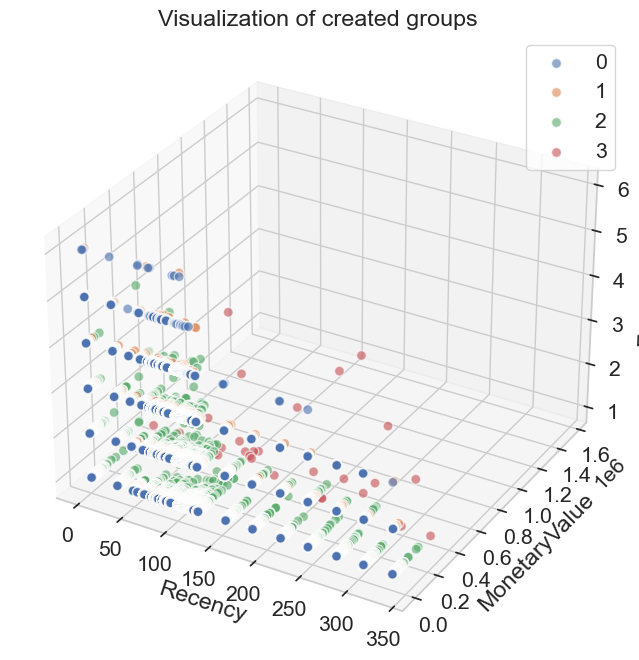

In [231]:
plots_model()

In [232]:
rfm_data.agg(['mean'])

,Recency,Frequency,MonetaryValue,groups
mean,128.747135,1.185806,1866.856351,0.022554


In [233]:
rfm_data.groupby('groups').agg(['mean'])

,Recency,Frequency,MonetaryValue
,mean,mean,mean
groups,,,
0,128.898347,1.181431,1209.265002
1,121.578735,1.396399,25073.733587
2,120.635020,1.383741,99717.714520
3,138.909091,1.272727,564041.798788


<Axes: title={'center': 'The sum of the values of individual groups'}, xlabel='groups'>

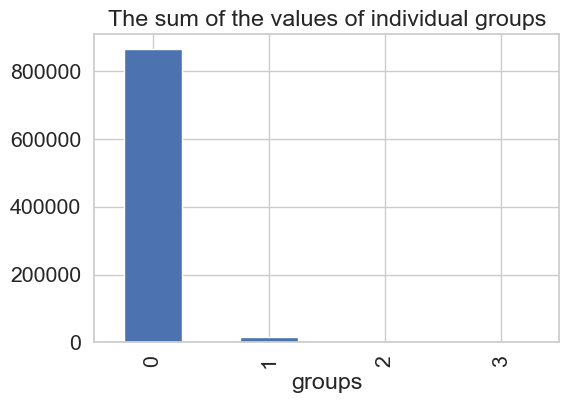

In [234]:
rfm_data.groups.value_counts().plot(kind='bar', figsize=(6,4), title='The sum of the values of individual groups')

In [235]:
def name(row):
    segment_mapping = {0: 'departing', 1: 'active', 2: 'inactive'}
    return segment_mapping.get(row, 'new')

rfm_data['SegmentName'] = rfm_data['groups'].apply(name)
rfm_data

,Recency,Frequency,MonetaryValue,groups,SegmentName
CustomerID,,,,,
C1010011,74,2,5106.0,0,departing
C1010012,117,1,1499.0,0,departing
C1010014,154,2,1455.0,0,departing
C1010018,85,1,30.0,0,departing
C1010024,113,1,5000.0,0,departing
...,...,...,...,...,...
C9099836,154,1,691.0,0,departing
C9099877,85,1,222.0,0,departing
C9099919,113,1,126.0,0,departing


In [236]:
rfm_data['groups'].value_counts()

groups
0    866146
1     16327
2      1759
3        33
Name: count, dtype: int64

* Cluster 0
* Cluster 1
* Cluster 2
* Cluster 3